<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')

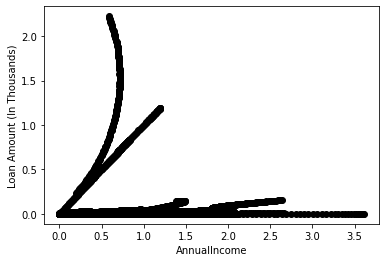

In [4]:
X = roomba_data[["X_error","Y_error"]]
#Visualise data points
plt.scatter(X["X_error"],X["Y_error"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

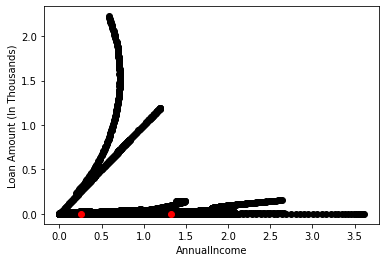

In [5]:
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["X_error"],X["Y_error"],c='black')
plt.scatter(Centroids["X_error"],Centroids["Y_error"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["X_error"]-row_d["X_error"])**2
            d2=(row_c["Y_error"]-row_d["Y_error"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["X_error","Y_error"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Y_error'] - Centroids['Y_error']).sum() + (Centroids_new['X_error'] - Centroids['Y_error']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Y_error","X_error"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1.794124008613159
1.847881096347298
1.8616231527281843
1.8674935477821366
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.8698797733411388
1.869879773341

In [ ]:
color=['blue','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["X_error"],data["Y_error"],c=color[k])
plt.scatter(Centroids["X_error"],Centroids["Y_error"],c='red')
# plt.xlabel('Income')
# plt.ylabel('Loan Amount (In Thousands)')
plt.show()